# Kaggle Competition: Santander Customer Satisfaction

In [7]:
# import all the things
import pandas as pd
import numpy as np

In [10]:
santander = pd.read_csv('train.csv', index_col='\'ID')
santander.shape

(76020, 370)

In [9]:
santander.head(10)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
'ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0


In [35]:
# check for numbers used as errors/unknowns
s = pd.DataFrame(santander.columns, columns=['columns'])
s['min'] = [santander[x].min() for x in santander.columns]
s['max'] = [santander[x].max() for x in santander.columns]
s.tail(10)   

,columns,min,max
360,saldo_medio_var33_hace2,0.00,50003.88
361,saldo_medio_var33_hace3,0.00,20385.72
362,saldo_medio_var33_ult1,0.00,138831.63
363,saldo_medio_var33_ult3,0.00,91778.73
364,saldo_medio_var44_hace2,0.00,438329.22
365,saldo_medio_var44_hace3,0.00,24650.01
366,saldo_medio_var44_ult1,0.00,681462.90
367,saldo_medio_var44_ult3,0.00,397884.30
368,var38,5163.75,22034738.76
369,TARGET,0.00,1.00


In [11]:
# visualize all the things
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [ ]:
# Pandas scatter plot
santander.plot(kind='scatter', x='var15', y='TARGET', alpha=0.1)

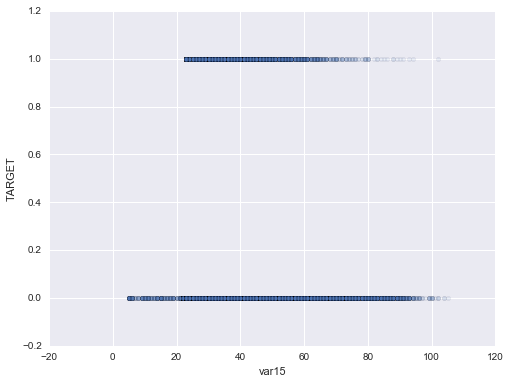

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['var15']
X = santander[feature_cols]
y = santander.TARGET
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)